In [87]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import os
import glob
from PIL import Image
import cv2

%matplotlib inline

In [88]:
# load dataset
files = glob.glob("dataset/*.png")
data = {'id': [],
        'img': []}
for i in range(1,len(files)+1):
    # read dataset  
    imBGR = cv2.imread("dataset/" + str(i) + ".png",1)
    # convert BGR to RGB
    imRGB = imBGR[..., ::-1]
    data['img'].append(imRGB)
    
    
# load attributes
a = pd.read_csv("attribute_list.csv")

# display attributes
a.head()

,5000,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,file_name,hair_color,eyeglasses,smiling,young,human
1,1,1,-1,1,1,-1
2,2,4,-1,1,1,1
3,3,5,-1,1,-1,-1
4,4,-1,-1,-1,-1,-1


In [89]:
# using dicts to restructure dataframe and to keep indexing consistent
a_dict = {'file_name' :a['5000'][1:],
          'hair_color':a['Unnamed: 1'][1:],
          'eyeglasses':a['Unnamed: 2'][1:],
          'smiling':a['Unnamed: 3'][1:],
          'young':a['Unnamed: 4'][1:],
          'human':a['Unnamed: 5'][1:],
          'img' : data['img']
         }

In [90]:
df = pd.DataFrame(data=a_dict)

In [91]:
# all non faces (natural backgrouns etc) will have -1 for each attribute 
# so sum of all attributes = -5

#exclusion list
ex = []

for i in range(1,1+len(df['file_name'])):
    c =int(df['hair_color'][i])
    c = c + int(df['eyeglasses'][i])
    c = c + int(df['smiling'][i])
    c = c + int(df['young'][i])
    c = c + int(df['human'][i])
    if c == -5:
        ex.append(i-1)
print(len(ex))

435


In [92]:
df = df.drop(df.index[ex])

In [93]:
df.head()

,file_name,hair_color,eyeglasses,smiling,young,human,img
1,1,1,-1,1,1,-1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,2,4,-1,1,1,1,"[[[85, 42, 37], [85, 45, 40], [86, 50, 43], [8..."
3,3,5,-1,1,-1,-1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
7,7,2,-1,1,1,-1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
8,8,3,-1,1,1,-1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [94]:
len(df)

4565

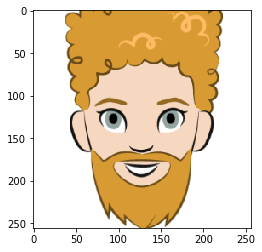

In [95]:
plt.imshow(df['img'][1])

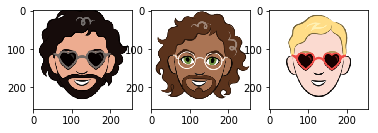

In [97]:
#display imges
plt.subplot(131)
plt.imshow(df['img'][np.random.randint(low=0,high=4999)])
plt.subplot(132)
plt.imshow(df['img'][np.random.randint(low=0,high=4999)])
plt.subplot(133)
plt.imshow(df['img'][np.random.randint(low=0,high=4999)])

Training Dataset:
Dataset used to train the model

Validation Dataset:
Sample of data used to provide an unbiased evaluation fo the model fit on the training dataset while tuning model hyper parameters.

Test Dataset:
Sample of data used to provide an unbiased evaluation fo the model fit on the training dataset. Only used once the model is completely trained 


### Dividing the dataset into Train Validation Test

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [99]:
cols = ['file_name','hair_color','eyeglasses','smiling','young','human']

In [100]:
# split 60 20 20 train val test 
#first spliting hold out test set
x_train_val, x_test, y_train_val, y_test = train_test_split(df['img'], df[cols], test_size=0.20)

In [105]:
y_train_val.head()

,file_name,hair_color,eyeglasses,smiling,young,human
4887,4887,4,-1,1,1,-1
604,604,1,-1,1,1,-1
3278,3278,0,1,1,-1,-1
2791,2791,0,-1,1,-1,1
1528,1528,1,1,1,1,-1
